In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import tqdm
import seaborn as sns
sns.set_style('white')
from keras.models import load_model



C:\Users\Shaan Desai\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


C:\Users\Shaan Desai\Anaconda3\lib\site-packages\keras\models.py:255: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


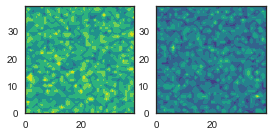

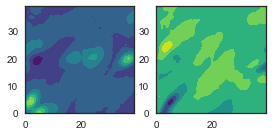

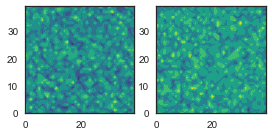

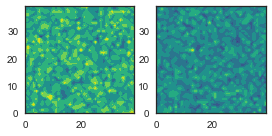

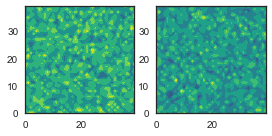

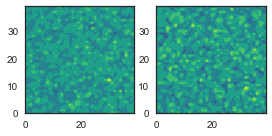

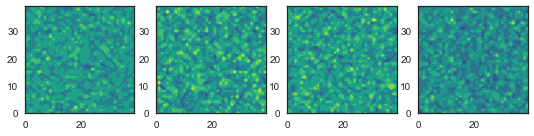

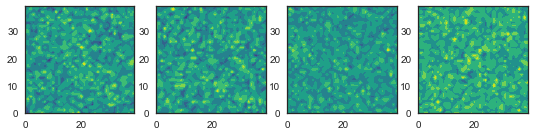

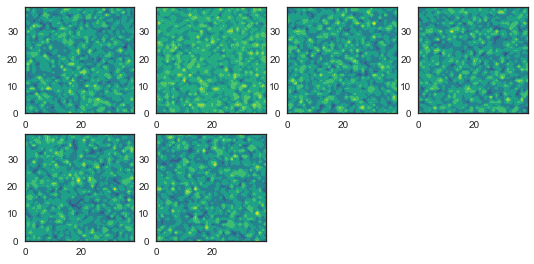

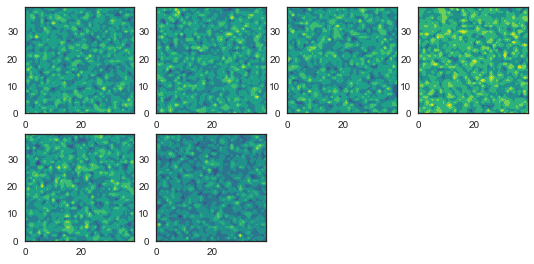

2


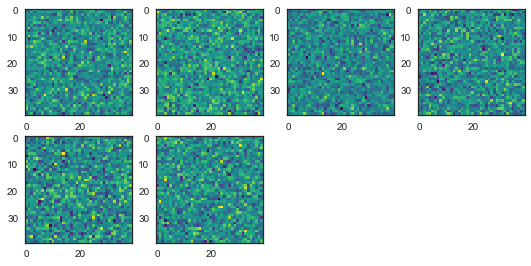

3


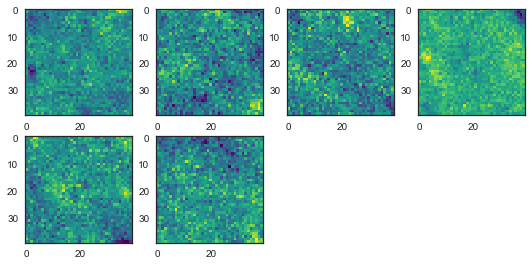

4


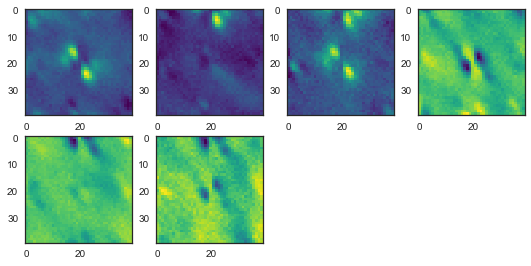

In [7]:
#function loops over experiments and gives you a filter plot in x-y, summed over z
for i in range(1,11):
    model = load_model('exp'+str(i)+'/'+'exp'+str(i)+'.h5')
    layer = model.layers[0]
    weights = layer.get_weights()
    plt.figure(figsize=(9,9))
    index = 0
    for i in range(weights[0].shape[3]):
        for j in range(weights[0].shape[4]):
            w = np.sum(weights[0][:,:,:,i,j],axis=2)
            #w = w.reshape(5,5)
            index+=1
            plt.subplot(4,4,index)
            plt.contourf(w, cmap='viridis')    

    plt.show()
    
#same as above for expnew experiments
for i in range(2,5):
    model = load_model('expnew'+str(i)+'/'+'expnew'+str(i)+'.h5')
    layer = model.layers[0]
    weights = layer.get_weights()
    plt.figure(figsize=(9,9))
    index = 0
    print(str(i))
    for i in range(weights[0].shape[3]):
        for j in range(weights[0].shape[4]):
            w = np.sum(weights[0][:,:,:,i,j],axis=2)
            #w = w.reshape(5,5)
            index+=1
            plt.subplot(4,4,index)
            plt.imshow(w, cmap='viridis')    

    plt.show()

In [14]:
# if you find interesting results, run them through this function
model = load_model('expnew'+str(4)+'/'+'expnew'+str(4)+'.h5')
    
def filter_plotter(model):
    ''' takes a model and displays each filter summed along x,y and z axes, 
    handles channels as well'''
    w = model.layers[0].get_weights()
    for filt_no in range(w[0].shape[4]):
        fig,ax = plt.subplots(2,3,figsize=(15,10))
        ax[0,0].imshow(np.mean(w[0][:,:,:,0,filt_no],axis=0),cmap='viridis')
        ax[0,0].set_title('y-z')
        ax[0,1].imshow(np.mean(w[0][:,:,:,0,filt_no],axis=1),cmap='viridis')
        ax[0,1].set_title('x-z')
        ax[0,2].imshow(np.mean(w[0][:,:,:,0,filt_no],axis=2),cmap='viridis')
        ax[0,2].set_title('x-y')
        
        ax[1,0].imshow(np.mean(w[0][:,:,:,1,filt_no],axis=0),cmap='viridis')
        ax[1,1].imshow(np.mean(w[0][:,:,:,1,filt_no],axis=1),cmap='viridis')
        ax[1,2].imshow(np.mean(w[0][:,:,:,1,filt_no],axis=2),cmap='viridis')
        plt.suptitle('Filter ' + str(filt_no))

C:\Users\Shaan Desai\Anaconda3\lib\site-packages\keras\models.py:255: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


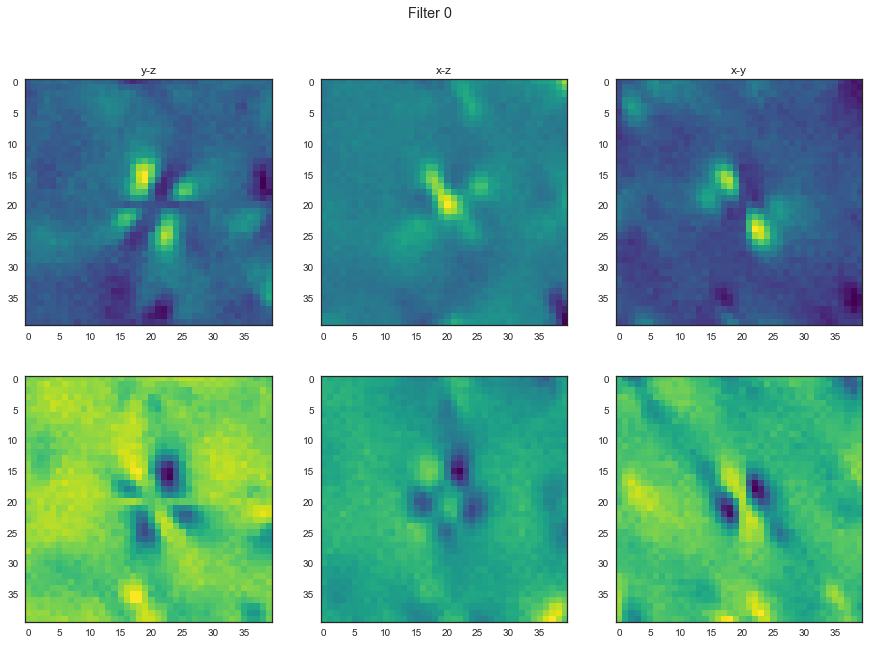

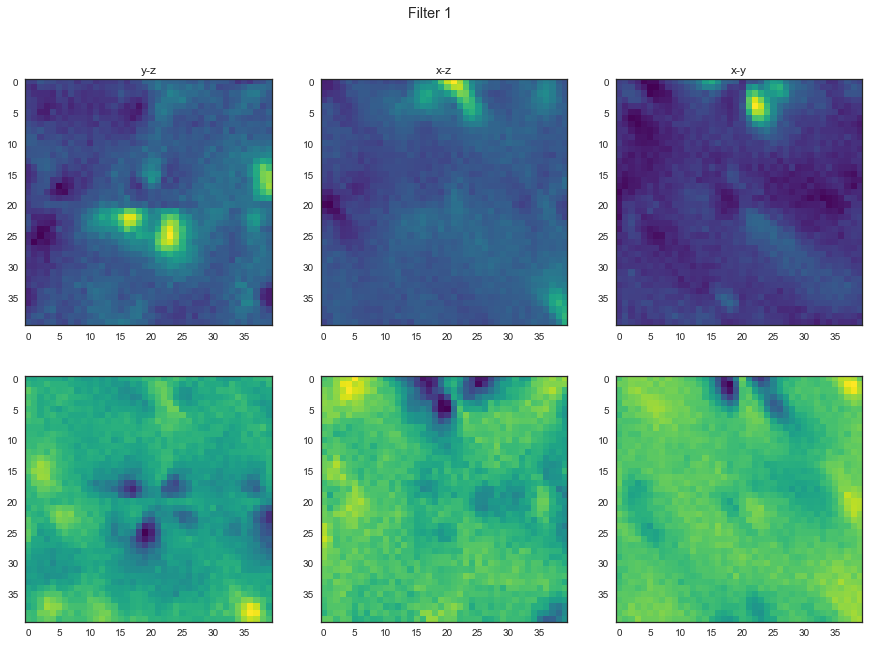

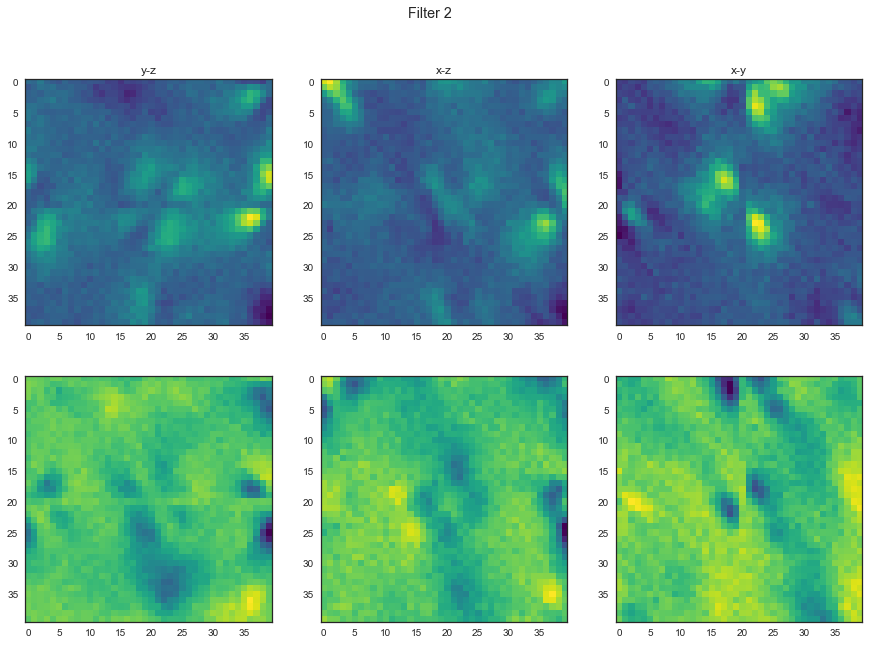

In [15]:
filter_plotter(model)